In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Privacy/')

Mounted at /content/drive


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
df = pd.read_csv('DATA.csv')
df[['2', 'GRADE']] = df[['2', 'GRADE']].astype('int64')

# '2' column: Sex[1, 2];
# 'GRADE' column: Grade[1, 2, 3, 4, 5, 6, 7]

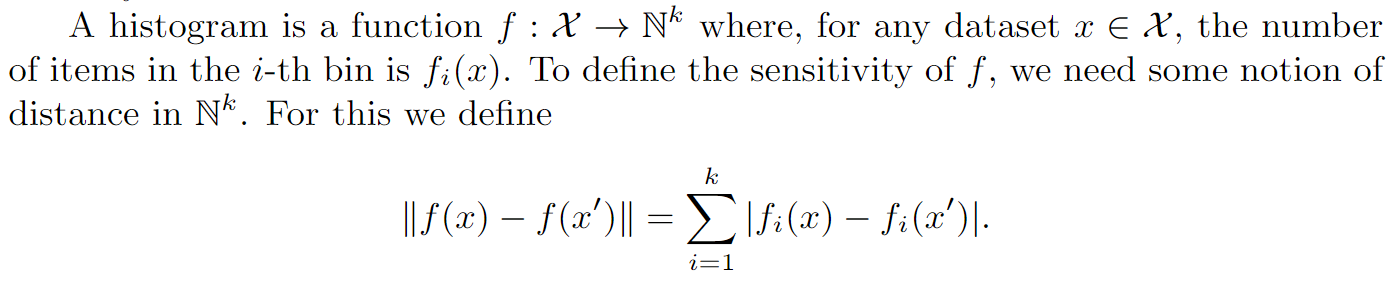

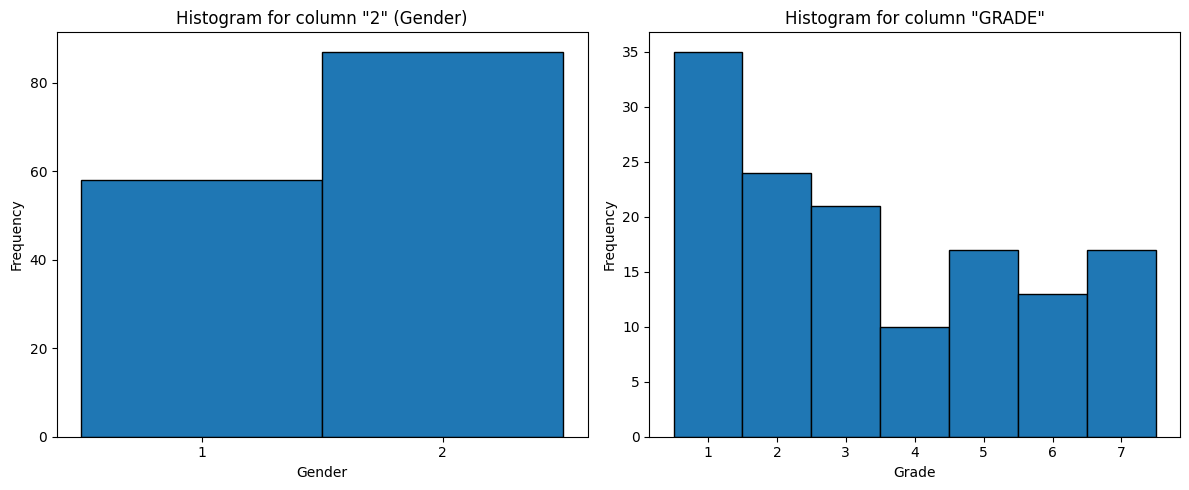

In [27]:
def compute_histogram(grade):
    # Calculate histogram using np.histogram
    # Histogram: A histogram is a tool that counts the distribution of values of an attribute in a set of statistics.
    # For example, you might have a histogram representing the distribution of ages, where each "box" or "bin" represents an age range (e.g. 20-29, 30-39, etc.) and counts the number of people in that range.
    hist, _ = np.histogram(grade, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5])
    return hist

data = df[['2', 'GRADE']].to_numpy()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plotting histogram for column Sex
axes[0].hist(data[:, 0], bins=range(1, 4), edgecolor='black', align='left')
axes[0].set_title('Histogram for column "2" (Gender)')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks([1, 2])
axes[0].set_xticklabels(['1', '2'])

# Plotting histogram for column Grade
axes[1].hist(data[:, 1], bins=range(1, 9), edgecolor='black', align='left')
axes[1].set_title('Histogram for column "GRADE"')
axes[1].set_xlabel('Grade')
axes[1].set_ylabel('Frequency')
axes[1].set_xticks(range(1, 8))

plt.tight_layout()
plt.show()

## For Grade column:

In [49]:
# sensitivity, in differential privacy, is the maximum possible output difference of a function when the database changes an entry. For histograms, this function is the count function.
# Consider an example: an entry with a GRADE of 2 is removed from the data and an entry with a GRADE of 7 is added. This means that the count for GRADE=2 decreases by 1 and the count for GRADE=7 increases by 1. So the overall change is 2.
# For a histogram, this function is a count function.
# Typically, for histograms, when we add or remove a data point:
# When we add a data point, the count for a particular bin increases by 1. # When we delete a data point, the count for a particular bin increases by 1.
# When we remove a data point, the count of a particular bin decreases by 1.
# But if we do both at the same time (e.g. delete a data point and add another), the maximum possible change is 2. This is because you subtract a count from one bin (decreasing it by 1) and add a count to another bin (increasing it by 1), so the total change is 2. # If we do both at the same time (e.g. delete a data point and add another), the maximum possible change is 2.
# The global sensitivity of the histogram is therefore 2. This is because we have to consider the worst case scenario (i.e., the largest change in output) when considering sensitivity.

sensitivity = 0

for i in range(data.shape[0]):
    data_prime = np.delete(data, i, axis=0)  # remove the ith row
    new_entry = np.array([random.choice([1, 2]), random.choice([1, 2, 3, 4, 5, 6, 7])])
    data_prime = np.append(data_prime, [new_entry], axis=0)  # add the new entry to the data
    hist_original, _ = np.histogram(data[:, 1], bins=range(1, 9))
    hist_prime, _ = np.histogram(data_prime[:, 1], bins=range(1, 9))
    current_sensitivity = np.sum(np.abs(hist_original - hist_prime))
    sensitivity = max(sensitivity, current_sensitivity)

    # print("current_sensitivity: ", current_sensitivity)

print(f"Sensitivity: {sensitivity}")

Sensitivity: 2


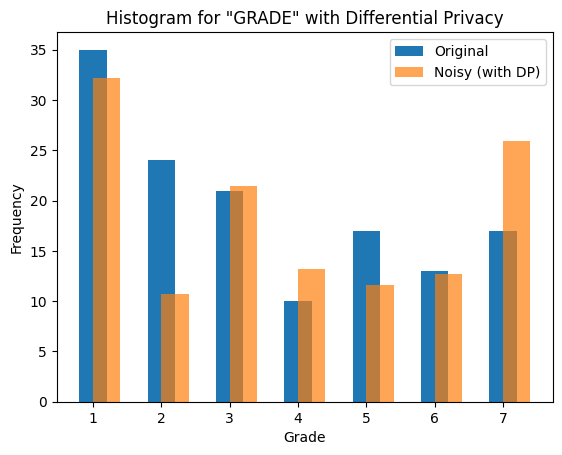

In [50]:
# Generate a histogram for the GRADE column
hist, edges = np.histogram(data[:, 1], bins=range(1, 9))

# Define the Laplace noise generation function
def laplace_noise(sensitivity, epsilon):
    return np.random.laplace(0, sensitivity / epsilon, 1)[0]

# Set the privacy parameter epsilon
epsilon = 0.5  # adjust this value as needed

# Apply Laplace noise to the histogram counts
noisy_hist = [count + laplace_noise(sensitivity, epsilon) for count in hist]

# Plot the original and noisy histograms
plt.bar(edges[:-1], hist, width=0.4, align='center', label='Original')
plt.bar(edges[:-1], noisy_hist, width=0.4, align='edge', label='Noisy (with DP)', alpha=0.7)
plt.legend()
plt.title('Histogram for "GRADE" with Differential Privacy')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.xticks(range(1, 8))
plt.show()

## For Sex column:

In [51]:
sensitivity_sex = 0

for i in range(data.shape[0]):
    data_prime = np.delete(data, i, axis=0)  # remove the ith row

    # When adding this, sensitivity_sex will equal to 0, why?
    # new_entry = np.array([random.choice([1, 2]), random.choice([1, 2, 3, 4, 5, 6, 7])])
    # data_prime = np.append(data_prime, [new_entry], axis=0)  # add the new entry to the data

    hist_original, _ = np.histogram(data[:, 0], bins=range(1, 3))
    hist_prime, _ = np.histogram(data_prime[:, 0], bins=range(1, 3))
    current_sensitivity = np.sum(np.abs(hist_original - hist_prime))
    sensitivity_sex = max(sensitivity_sex, current_sensitivity)

    # print("current_sensitivity: ", current_sensitivity)
    # print(data[i, 0])

print(f"Sensitivity_sex: {sensitivity_sex}")

Sensitivity_sex: 1


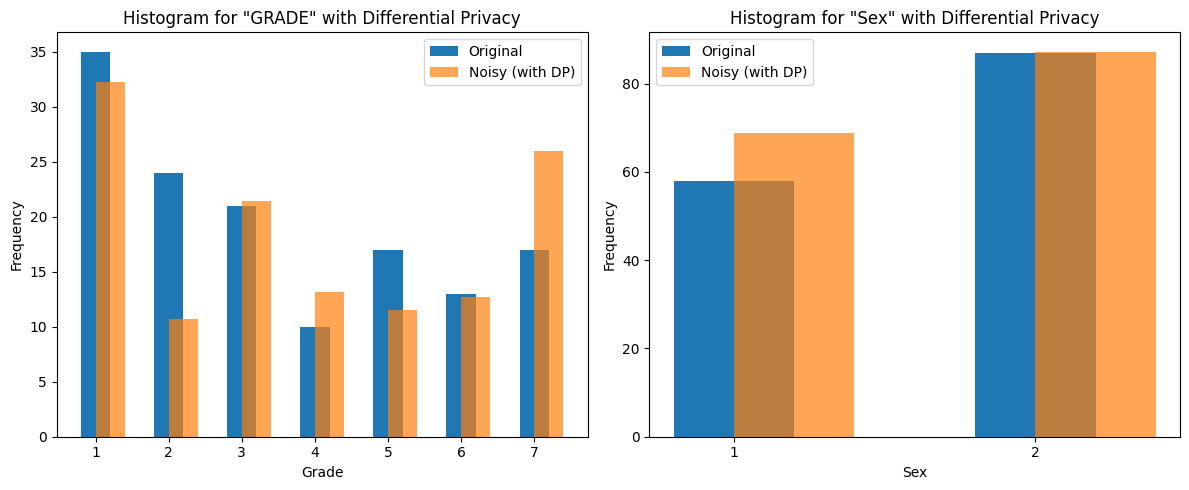

In [52]:
# Calculate histogram for the "Sex" column
sex_hist, sex_edges = np.histogram(data[:, 0], bins=[1, 2, 3])  # note the bins here

# Apply Laplace noise to the histogram counts for the "Sex" column
noisy_sex_hist = [count + laplace_noise(sensitivity_sex, epsilon) for count in sex_hist]

# Plot both histograms side by side for comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Original and noisy histograms for "GRADE"
ax[0].bar(edges[:-1], hist, width=0.4, align='center', label='Original')
ax[0].bar(edges[:-1], noisy_hist, width=0.4, align='edge', label='Noisy (with DP)', alpha=0.7)
ax[0].set_title('Histogram for "GRADE" with Differential Privacy')
ax[0].set_xlabel('Grade')
ax[0].set_ylabel('Frequency')
ax[0].set_xticks(range(1, 8))
ax[0].legend()

# Original and noisy histograms for "Sex"
ax[1].bar(sex_edges[:-1], sex_hist, width=0.4, align='center', label='Original')
ax[1].bar(sex_edges[:-1], noisy_sex_hist, width=0.4, align='edge', label='Noisy (with DP)', alpha=0.7)
ax[1].set_title('Histogram for "Sex" with Differential Privacy')
ax[1].set_xlabel('Sex')
ax[1].set_ylabel('Frequency')
ax[1].set_xticks([1, 2])
ax[1].legend()

plt.tight_layout()
plt.show()